In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from ClusterModel import model
from ClusterTools import cluster_profile
from ClusterTools import cluster_spectra
from ClusterTools import cluster_spectra_kafexhiu2014

dict_base = {'font.size':        16, 
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster()
clust.EBL_model = 'none'
clust.nuclear_enhancement = False
clust.helium_mass_fraction = 0.0
clust.abundance = 0.0
clust.Epmax = 1e7*u.GeV

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.
Setting EBL_model value
Setting nuclear_enhancement value
Setting helium mass fraction value
Setting abundance value
Setting Epmax value


In [31]:
clust.set_pressure_gas_gNFW_param('A10MD')

Setting gNFW Arnaud et al. (2010) morphologically disturbed.


In [32]:
clust.Npt_per_decade_integ = 1000

Setting number of point per decade (for integration) value


In [37]:
r, x = clust.get_crp_to_thermal_energy_profile(Emin=10*u.GeV, Emax=None)

In [40]:
r2, x2 = clust.get_crp_to_thermal_energy_profile2(Emin=10*u.GeV, Emax=None)

Getting R500 value


<Quantity 1548.6776465 kpc>

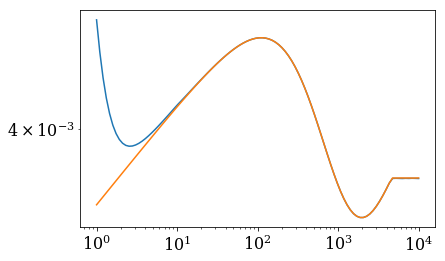

In [41]:
plt.loglog(r,x)
plt.loglog(r2,x2)
#plt.ylim(0.009,0.012)
clust.R500

In [69]:
%%timeit
e1, s1 = clust.get_crp_spectrum(energy=np.logspace(-1,8,100)*u.GeV, Rmax=100*u.kpc)

100 loops, best of 3: 4.28 ms per loop


In [70]:
%%timeit
e2, s2 = clust.get_crp_spectrum2(energy=np.logspace(-1,8,100)*u.GeV, Rmax=100*u.kpc)

100 loops, best of 3: 4.04 ms per loop


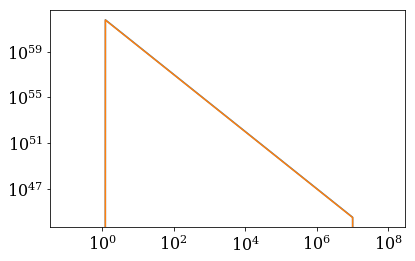

In [54]:
plt.loglog(e1, s1)
plt.loglog(e2,s2)

In [4]:
#%%timeit
r,n1 = clust.get_density_crp_profile(Emin=100*u.GeV, Emax = 1*u.TeV)

/Users/adam/Project/CTA/Phys/Software/ClusterTools/cluster_global.py:161: RuntimeWarning: divide by zero encountered in double_scalars
  mu_alpha = 4.0 / X[1]


In [5]:
#%%timeit
r,n2 = clust.get_density_crp_profile2(Emin=100*u.GeV, Emax = 1*u.TeV)

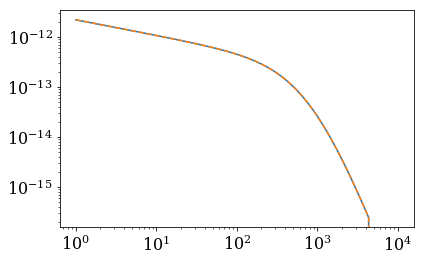

In [6]:
plt.loglog(r,n1)
plt.loglog(r,n2, '--')

In [29]:
print(clust._get_crp_normalization()/4.1722798e-10)
print(clust._get_crp_normalization2()/4.1722798e-10)

[0.97438526] 1 / (cm3 GeV)
[1.00007694] 1 / (cm3 GeV)


In [7]:
%%timeit
r1,m1 = clust.get_thermal_energy_profile()

10 loops, best of 3: 88.2 ms per loop


In [8]:
%%timeit
r2,m2 = clust.get_thermal_energy_profile2()

10 loops, best of 3: 113 ms per loop


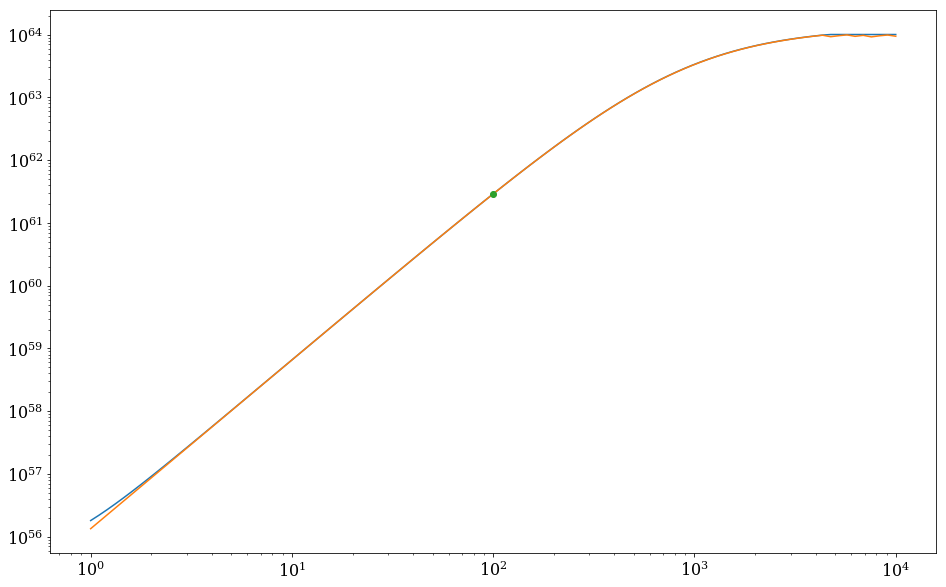

In [12]:
plt.figure(1, figsize=(15,10))
plt.loglog(r1,m1)
plt.loglog(r2,m2)
plt.plot(100*u.kpc, clust.get_thermal_energy_profile(100*u.kpc)[1], 'o')
#plt.xlim(1e3,1e4)
#plt.ylim(1e14,2e14)

In [ ]:
plt.loglog(r1, (m1-m2)/m1)


In [ ]:
crp = clust.get_crp_2d(radius=np.logspace(0,4,30)*u.kpc, energy=np.logspace(-2,7,50)*u.GeV)

plt.figure(1, figsize=(10,10))
plt.imshow(np.log10(crp.value), origin='lower')
plt.colorbar()

In [ ]:
dNdVdtdE_g = clust.get_rate_gamma_ray()
dNdVdtdE_e = clust.get_rate_cre()
dNdVdtdE_nu = clust.get_rate_neutrino()

plt.figure(1, figsize=(15,5))
plt.subplot(131)
plt.imshow(np.log10(dNdVdtdE_g.value), origin='lower')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.log10(dNdVdtdE_e.value), origin='lower')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.log10(dNdVdtdE_nu.value), origin='lower')
plt.colorbar()

In [ ]:
#%%timeit
e1, s1 = clust.testfunc()

In [ ]:
#%%timeit
e2, s2 = clust.testfunc2()

In [ ]:
plt.loglog(e1.to('GeV'),(e1**2*s1).to('MeV s-1 cm-2'))
plt.loglog(e2.to('GeV'),(e2**2*s2).to('MeV s-1 cm-2'))

In [ ]:
plt.plot(e1, ((e1**2*s1).to('MeV s-1 cm-2')-(e2**2*s2).to('MeV s-1 cm-2')) / (e2**2*s2).to('MeV s-1 cm-2')*100)
plt.xscale('log')
plt.ylabel('difference %')